# Data exploration and Feature extraction

sources:
* https://www.sharpsightlabs.com/blog/data-analysis-machine-learning-example-1/

**THE MAIN PREREQUISITE FOR MACHINE LEARNING IS DATA ANALYSIS**

**80% OF THE DATA SCIENTIST WORK WILL BE DATA PREPARATION, EDA, AND VISUALIZATION**

![image](https://cdn-coiao.nitrocdn.com/CYHudqJZsSxQpAPzLkHFOkuzFKDpEHGF/assets/static/optimized/wp-content/uploads/2016/05/163e383d244161938573edbab7670f76.2016-05-07_data-analysis-is-the-prerequisite_how-we-use-dataAnalysis.png)

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Step-1:-get-the-data" data-toc-modified-id="Step-1:-get-the-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Step 1: get the data</a></span></li><li><span><a href="#Step-2:-basic-data-exploration" data-toc-modified-id="Step-2:-basic-data-exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Step 2: basic data exploration</a></span><ul class="toc-item"><li><span><a href="#Missing-value" data-toc-modified-id="Missing-value-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Missing value</a></span></li><li><span><a href="#View-data-distribution" data-toc-modified-id="View-data-distribution-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>View data distribution</a></span></li><li><span><a href="#Identify-outlier" data-toc-modified-id="Identify-outlier-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Identify outlier</a></span></li><li><span><a href="#Check-correlation-between-features" data-toc-modified-id="Check-correlation-between-features-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Check correlation between features</a></span></li></ul></li><li><span><a href="#Prepare-dataset" data-toc-modified-id="Prepare-dataset-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Prepare dataset</a></span><ul class="toc-item"><li><span><a href="#Split-the-dataset" data-toc-modified-id="Split-the-dataset-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Split the dataset</a></span></li><li><span><a href="#Build-the-pipeline" data-toc-modified-id="Build-the-pipeline-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Build the pipeline</a></span></li></ul></li><li><span><a href="#Your-work---Palmer-Archipelago-(Antarctica)-penguin-data" data-toc-modified-id="Your-work---Palmer-Archipelago-(Antarctica)-penguin-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Your work - Palmer Archipelago (Antarctica) penguin data</a></span></li></ul></div>

## Step 1: get the data

The Boston dataset contains data on median house price for houses in the Boston area. The variable that we’ll try to predict is the medv variable (median house price). The dataset has roughly a dozen other predictors that we’ll be investigating and using in our model.

This dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass. It was obtained from the StatLib archive (http://lib.stat.cmu.edu/datasets/boston), and has been used extensively throughout the literature to benchmark algorithms. However, these comparisons were primarily done outside of Delve and are thus somewhat suspect. The dataset is small in size with only 506 cases.

The data was originally published by *Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.'*

The name for this dataset is simply boston. It has two prototasks: **NOX**, in which the nitrous oxide level is to be predicted; and *MEDV*, in which the median value of a home is to be predicted (MEDV has been renamed to target, int the following code)


There are 14 attributes in each case of the dataset. They are:
* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per \$10,000
* PTRATIO - pupil-teacher ratio by town
* B - $1000(Bk - 0.63)^2$ where Bk is the proportion of blacks by town
* LSTAT - percentage of lower status of the population
* MEDV - Median value of owner-occupied homes in \$1000's

In [144]:
# boston housing price
from sklearn.datasets import load_boston

# load boston
boston = load_boston()

# create pandas df
data_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
print(boston.target.shape)
data_boston['target'] = pd.DataFrame(boston.target.reshape(-1,1), columns=["target"])
data_boston.head(50)

(506,)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


As I already mentioned, the example we’ll be working through is a bit of a “toy” example, and as such, we’re working with a dataset that’s relatively “easy to use.” What I mean is that I’ve chosen this dataset because it’s easy to obtain and it doesn’t require much data cleaning.

However, keep in mind that in a typical business or industry setting, you’ll probably need to get your data from a database using SQL or possibly from a spreadsheet or other file.

Moreover, it’s very common for data to be “messy.” The data may have lots of missing values; variable names and class names that need to be changed; or other details that need to be altered.

To start, each column must have its type correctly assigned.

In [3]:
data_boston['CHAS'] = data_boston['CHAS'].astype('bool')
data_boston.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS          bool
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
target     float64
dtype: object

## Step 2: basic data exploration

After getting the dataset, the next step in the model building workflow is almost always data visualization. Specifically, we’ll perform exploratory data analysis on the data to accomplish several tasks:

1. Missing value
1. View data distributions
1. Identify outliers
1. Check correlation between features

### Missing value

Handling missing data is important as many machine learning algorithms do not support data with missing values. There are two main approaches:

* Delete rows with missing values :
* Imput (i.e. replace) missing values with sensible values.

You will find [here](https://machinelearningmastery.com/handle-missing-data-python/) a tutorial that presents these two approaches and gives indications on how to handle missing values

In [4]:
# Is there some missing value ?
data_boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

In this dataset, there are no missing values. So nothing to do.

### View data distribution

Let's begin our exploration of the data by visualizing the distributions of the data. Many things are possible. The code below details a simple but not complete first approach. The two following tutorials, complete the given examples.

* [A Gentle Introduction to Data Visualization Methods in Python](https://machinelearningmastery.com/data-visualization-methods-in-python/), describes the main functions of matplotlib
* [How to use Seaborn Data Visualization for Machine Learning](https://machinelearningmastery.com/seaborn-data-visualization-for-machine-learning/), describes the main functions of seaborn

In the following, we will mainly use the functions integrated in Pandas. We start by visualizing the distribution of our target variable.

To do this, we will first use a basic histogram and then plot a density. The density plot is essentially a variation of the histogram.

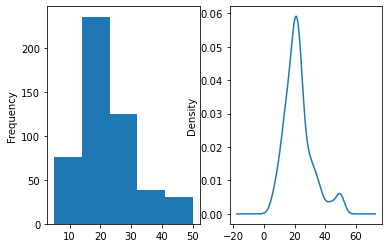

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2)

data_boston['target'].plot.hist(bins=5, ax=axes[0]) # Try to change bins number
data_boston['target'].plot.kde(ax=axes[1]);


Let’s examine the plots. We can immediately see a few important details:

1. It’s not perfectly normal. This is one of the things we’re looking for when we visualize our data (particularly for linear regression). I’ll save a complete explanation of why we test for normality in linear regression and machine learning, but in brief, we are examining this because many machine learning techniques require normally distributed variables.

2. It appears that there may be a few minor outliers in the far right tail of the distribution. For the sake of simplicity, we’re not going to deal with those outliers here; we’ll be able to build a model (imperfect though it might be) without worrying about those outliers right now.

Between histograms and density plots, some people strongly prefer histograms. The primary reason for this is that histograms tend to “provide better information on the exact location of data” (which is good for detecting outliers). This is true in particular when you use a relatively larger number of histogram bins; a histogram with a sufficiently large number of bins can show you peaks and unusual data details a little better, because it doesn’t smooth that information away. Histograms with a small number of bins can smooth that information out too much. **So, when we’re visualizing a single variable, the histogram might be the better option.**

However, when we’re visualizing multiple variables at a time, density plots are easier to work with. If you attempt to plot several histograms at the same time by using a small multiple chart, it can be very difficult to select a single binwidth that properly displays all of your variables. Because of this, density plots are easier to work with when you’re visualizing multiple variables in a small multiple chart. **Density plots show the general shape of the data and we don’t have to worry about choosing the number of bins.**

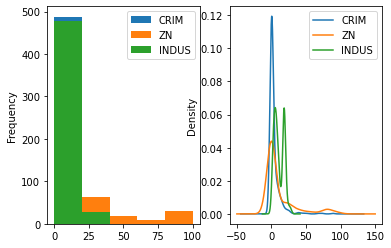

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=2)

data_boston[['CRIM', 'ZN', 'INDUS']].plot.hist(bins=5, ax=axes[0]) # Try to change bins number
data_boston[['CRIM', 'ZN', 'INDUS']].plot.kde(ax=axes[1]);

It is also possible to display a very large number of variables in different plots in order to watch:

1. Outliers
2. Skewness
3. Other deviations from normality

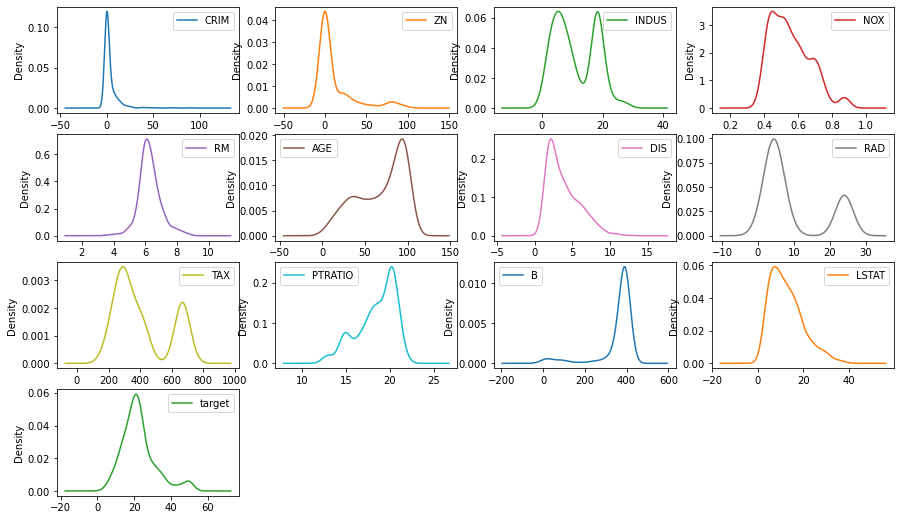

In [7]:
data_boston.plot.kde(subplots=True, sharex=False, layout=(4,4), figsize=(15,9));

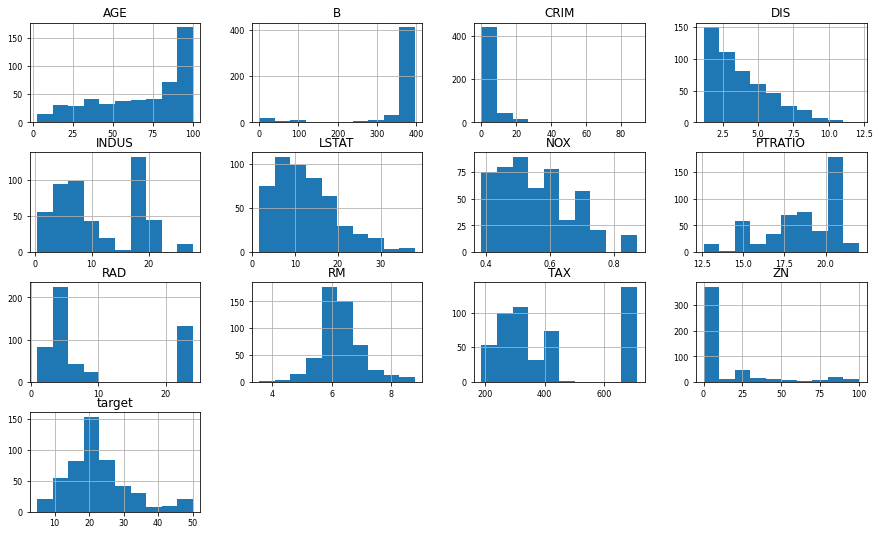

In [8]:
numeric_features = [f for f, t in zip(data_boston.columns, data_boston.dtypes) if t in ['float64', 'int32']]
data_boston[numeric_features].hist(layout=(4,4), bins=10, xlabelsize=8, ylabelsize=8, figsize=(15,9));

### Identify outlier

The presence of outliers in a classification or regression dataset can result in a poor fit and lower predictive modeling performance.

Identifying and removing outliers is challenging with simple statistical methods for most machine learning datasets given the large number of input variables. Instead, automatic outlier detection methods can be used in the modeling pipeline and compared, just like other data preparation transforms that may be applied to the dataset.

In this [tutorial](https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/), you will discover different techniques to automatically identify outliers. Since we don't have all the tools yet, we will proceed more simply.

* We will display the numerical features and see which ones have very few outliers or explainable values.
* Then we will remove the values that we think are outliers


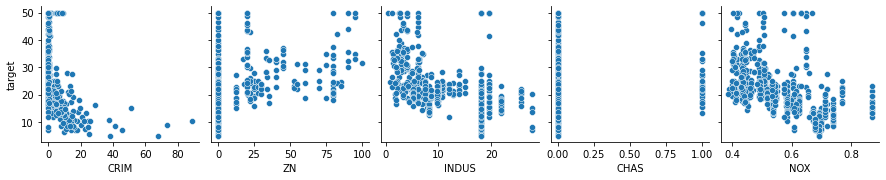

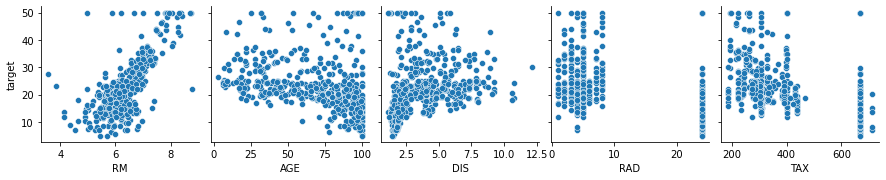

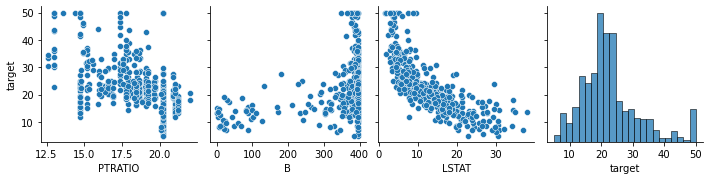

In [9]:
for i in range(0, len(data_boston.columns), 5):
    sns.pairplot(data=data_boston,
                x_vars=data_boston.columns[i:i+5],
                y_vars=['target'])

In the absence of a statistical measurement tool, it is quite difficult to identify outliers.

* We can easily see that prices above 50 have been reduced to this value (target variable) -> We could therefore decide to delete the observations that have prices equal to this value

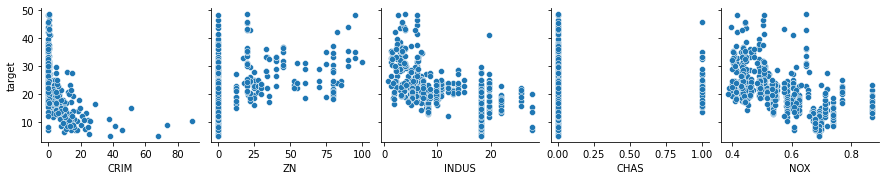

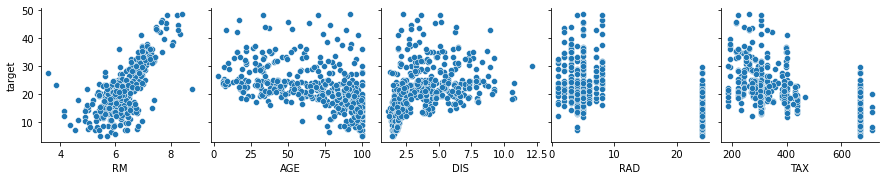

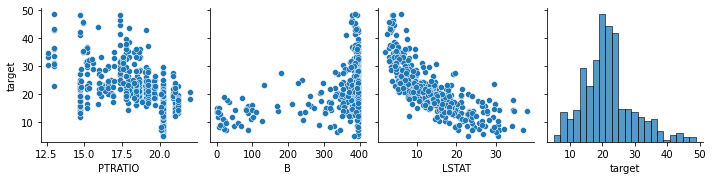

In [10]:
data_boston_cleaned = data_boston.drop(data_boston[data_boston['target'] >= 50].index)
for i in range(0, len(data_boston_cleaned.columns), 5):
    sns.pairplot(data=data_boston_cleaned,
                x_vars=data_boston_cleaned.columns[i:i+5],
                y_vars=['target'])

###  Check correlation between features

There may be complex and unknown relationships between the variables in your dataset.

It is important to discover and quantify the degree to which variables in your dataset are dependent upon each other. This knowledge can help you better prepare your data to meet the expectations of machine learning algorithms, such as linear regression, whose performance will degrade with the presence of these interdependencies.

It's possible to plot the correlation between features and target using pandas correlation function and sns to lot the result.

This [tutorial](https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/) gives more information.

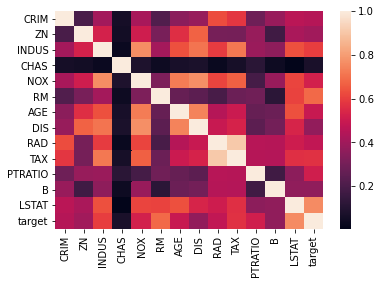

In [11]:
sns.heatmap(data_boston_cleaned.corr().abs());

We will try to find which features are strongly correlated with the target

In [12]:
df_num_corr = data_boston_cleaned.corr()['target'][:-1] # -1 because the latest row is our target
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with the target:\n{}".format(len(golden_features_list), golden_features_list))

There is 6 strongly correlated values with the target:
RM         0.686634
PTRATIO   -0.518641
NOX       -0.524451
TAX       -0.572442
INDUS     -0.600005
LSTAT     -0.759837
Name: target, dtype: float64


We can now visualize these features. As these data are highly correlated with the target, they should have an important weight when building the model.

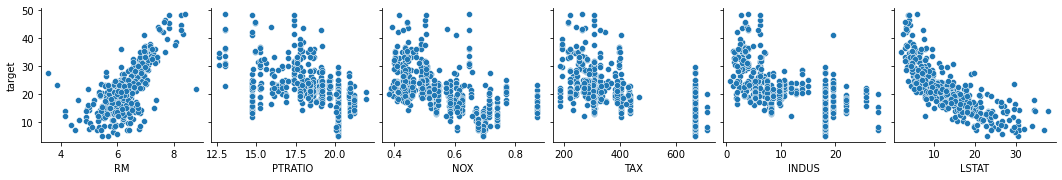

In [13]:
sns.pairplot(data=data_boston_cleaned,
                x_vars=golden_features_list.index,
                y_vars=['target']);

## Prepare dataset

There are standard workflows in a machine learning project that can be automated.

In Python scikit-learn, Pipelines help to to clearly define and automate these workflows.

Pipelines work by allowing for a linear sequence of data transforms to be chained together culminating in a modeling process that can be evaluated.

The goal is to ensure that all of the steps in the pipeline are constrained to the data available for the evaluation, such as the training dataset or each fold of the cross validation procedure.

You can learn more about Pipelines in scikit-learn by reading the [Pipeline section](https://scikit-learn.org/stable/modules/compose.html) of the user guide. You can also review the API documentation for the [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) and [FeatureUnion](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.FeatureUnion.html) classes in the pipeline module.

The main steps are:

- Split the dataset into a train part and a test part
- normalize or binarize the numerical features
- ordinal encode nominal categorical features for which it is desirable to keep the order 
- one hot encode the remaining features

### Split the dataset

The train-test split is a technique for evaluating the performance of a machine learning algorithm.

It can be used for classification or regression problems and can be used for any supervised learning algorithm.

The procedure involves taking a dataset and dividing it into two subsets. The first subset is used to fit the model and is referred to as the training dataset. The second subset is not used to train the model; instead, the input element of the dataset is provided to the model, then predictions are made and compared to the expected values. This second dataset is referred to as the test dataset.

* **Train Dataset:** Used to fit the machine learning model.
* **Test Dataset:** Used to evaluate the fit machine learning model.

The objective is to estimate the performance of the machine learning model on new data: data not used to train the model or to find best hyper-parameters.

In [14]:
from sklearn.model_selection import train_test_split


# target in "y"
y = data_boston_cleaned['target']

# feature matrix in "X" 
columns = list(data_boston_cleaned.columns)
columns.remove('target')
X = data_boston_cleaned[columns]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((367, 13), (123, 13), (367,), (123,))

### Build the pipeline

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [16]:
numeric_features = [f for f, t in zip(X_train.columns, X_train.dtypes) if t in ['float64', 'int32']]
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])
numeric_features

['CRIM',
 'ZN',
 'INDUS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [17]:
categorical_features = [f for f in X_train.columns if f not in numeric_features]
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
categorical_features

['CHAS']

In [18]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [19]:
# Append regressor to preprocessing pipeline.
# Now we have a full prediction pipeline.
from sklearn.linear_model import LinearRegression

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', LinearRegression())])



In [20]:
# Model training
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['CRIM', 'ZN', 'INDUS', 'NOX',
                                                   'RM', 'AGE', 'DIS', 'RAD',
                                                   'TAX', 'PTRATIO', 'B',
                                                   'LSTAT']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['CHAS'])])),
                ('regressor', LinearRegression())])

In [21]:
# Prediction
y_pred = clf.predict(X_test)

In [22]:
# Model evaluation


from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, y_pred)
print("model mean squared error: %.3f" % MSE)

model mean squared error: 13.150


## Your work - Palmer Archipelago (Antarctica) penguin data

Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network. 

Please cite this data using: *Gorman KB, Williams TD, Fraser WR (2014) Ecological Sexual Dimorphism and Environmental Variability within a Community of Antarctic Penguins (Genus Pygoscelis). PLoS ONE 9(3): e90081. doi:10.1371/journal.pone.0090081*

`penguins_size.csv` is simplified data from original penguin data sets and contains variables:

* species: penguin species (Chinstrap, Adélie, or Gentoospecies: penguin species (Chinstrap, Adélie, or Gentoo`)
* culmen_length_mm: culmen length (mm) 
* culmen_depth_mm: culmen depth (mm) 
* flipper_length_mm: flipper length (mm) 
* body_mass_g: body mass (g) 
* island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
* sex: penguin sex

The culmen is "the upper ridge of a bird's beak" (definition from Oxford Languages). 

The goal, is to predict the species ![species](https://imgur.com/orZWHly.png)

In [9]:
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
    # Handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context
    
# Read dataset with pandas
path = "http://www.i3s.unice.fr/~riveill/dataset/penguins_size.csv"

penguins = pd.read_csv(path)
penguins.head(5)

print(type(penguins))
penguins.head(5)




<class 'pandas.core.frame.DataFrame'>


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [10]:
# Look at the initial type of each column
# Use dtypes function
print(penguins.dtypes)
'''Put your code here'''

species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object


'Put your code here'

In [11]:
# Assign the correct type to each column
# Use astype function and verify the type of each columns

penguins['species'] = penguins['species'].astype('category')
penguins['island'] = penguins['island'].astype('category')
penguins['sex'] = penguins['sex'].astype('category')
print(penguins.dtypes)



species              category
island               category
culmen_length_mm      float64
culmen_depth_mm       float64
flipper_length_mm     float64
body_mass_g           float64
sex                  category
dtype: object


In [12]:
#data_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
#print(boston.target.shape)
#penguins['target'] = pd.DataFrame(penguins.target.reshape(-1,1), columns=["target"])

#print(penguins["target"])

# Replace the name of the target column with target
# Use rename function and print some line of the dataset
penguins=penguins.rename(columns={"species": "target"})
penguins.head(5)
print(penguins.dtypes)



target               category
island               category
culmen_length_mm      float64
culmen_depth_mm       float64
flipper_length_mm     float64
body_mass_g           float64
sex                  category
dtype: object


In [13]:
# Are there any missing values ?
# Use isnull / sum function
penguins.isnull().sum()

target                0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

We have just seen that we can process the missing values in the pipeline. However, as we are going to explore the data, it may be interesting to remove the missing values first. 

In [14]:
# Remove missing values, by preparing a new dataframe
# Use dropna function and check if they are some missing value
penguins= penguins.dropna()



<AxesSubplot:>

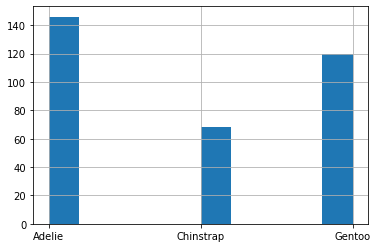

In [15]:
# Is the dataset well balanced? To do so, display the histogram or a pie of the target class.
# Use the value_counts / plot.pie function

#penguins['target'].value_counts().hist() 
penguins['target'].hist()


In [16]:
print(penguins["target"].count())
print(penguins['target'].value_counts())

334
Adelie       146
Gentoo       120
Chinstrap     68
Name: target, dtype: int64


array([[<AxesSubplot:title={'center':'culmen_length_mm'}>,
        <AxesSubplot:title={'center':'culmen_depth_mm'}>],
       [<AxesSubplot:title={'center':'flipper_length_mm'}>,
        <AxesSubplot:title={'center':'body_mass_g'}>]], dtype=object)

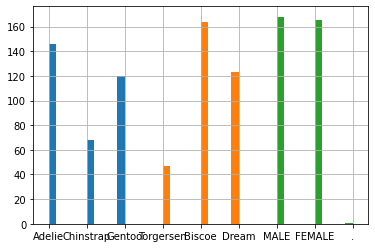

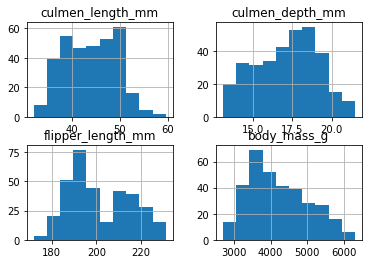

In [17]:
# Plot the distribution of each features
# Use the hist function

penguins['target'].hist()
penguins['island'].hist()
penguins['sex'].hist()
penguins.hist()




target
Adelie       [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
Chinstrap    [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
Gentoo       [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
dtype: object

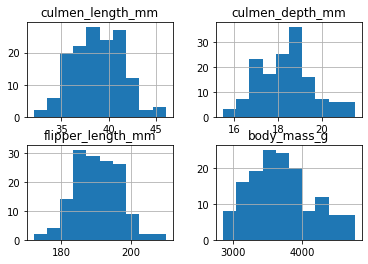

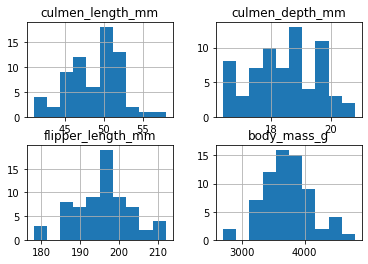

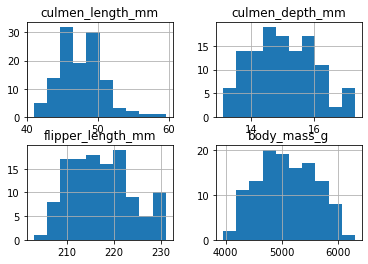

In [18]:
# Plot the distribution of each features by target class
# Use the groupby / hist function



penguins.groupby("target").hist()

array([[<AxesSubplot:title={'center':'Adelie'}>,
        <AxesSubplot:title={'center':'Chinstrap'}>],
       [<AxesSubplot:title={'center':'Gentoo'}>, <AxesSubplot:>]],
      dtype=object)

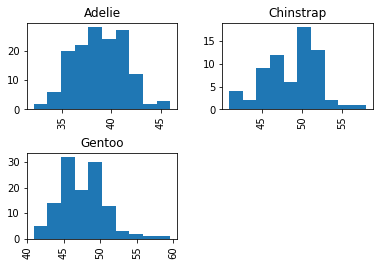

In [19]:
# Plot the distribution and the density of the culmen_length_mm features by target class
# Use groupby / hist and plot.kde function


penguins["culmen_length_mm"].hist(by=penguins["target"])

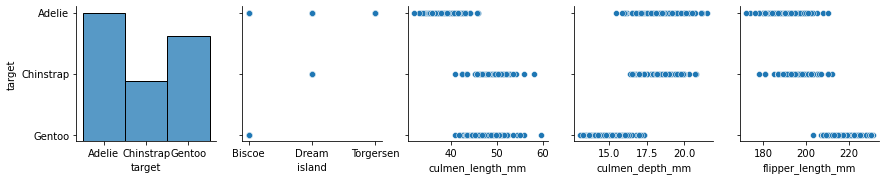

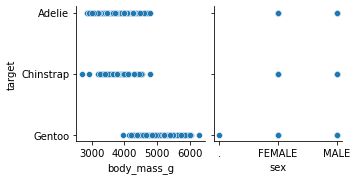

In [20]:
# Try to identify outliers
# Use sns.parplot function
for i in range(0, len(penguins.columns), 5):
    sns.pairplot(data=penguins,
                x_vars=penguins.columns[i:i+5],
                y_vars=['target'])

It seems that the sex is not known for some observations. We could delete them.

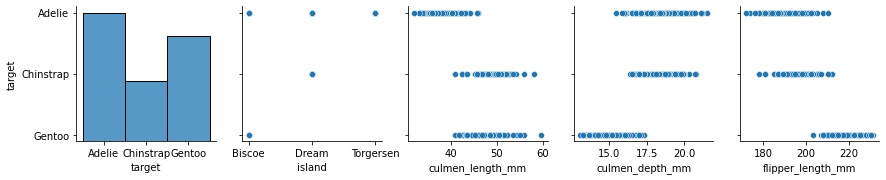

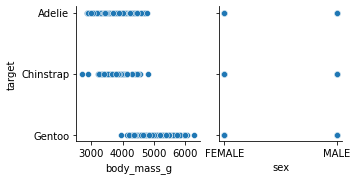

In [21]:
# Remove the detected outlier
# Use drop function



penguins_cleaned1 = penguins.drop(penguins[penguins['sex']!= "MALE"].index )
penguins_cleaned2 = penguins.drop(penguins[penguins['sex']!= "FEMALE"].index )
penguins_cleaned1 = penguins_cleaned1.append(penguins_cleaned2)


for i in range(0, len(penguins_cleaned1.columns), 5):
    sns.pairplot(data=penguins_cleaned1,
                x_vars=penguins_cleaned1.columns[i:i+5],
                y_vars=['target'])

                   culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
culmen_length_mm           1.000000        -0.228626           0.653096   
culmen_depth_mm           -0.228626         1.000000          -0.577792   
flipper_length_mm          0.653096        -0.577792           1.000000   
body_mass_g                0.589451        -0.472016           0.872979   

                   body_mass_g  
culmen_length_mm      0.589451  
culmen_depth_mm      -0.472016  
flipper_length_mm     0.872979  
body_mass_g           1.000000  


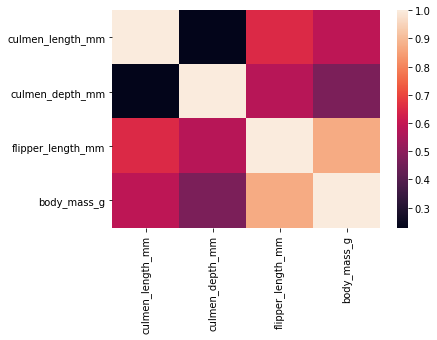

In [24]:
# Using sns, display the correlations between the features. What do you observe?
# Use heatmap function
#print(penguins_cleaned)
sns.heatmap(penguins_cleaned1.corr().abs());
print(penguins_cleaned1.corr())



Contrary to the previous example, it is not possible to have a correlation between all the features. It is only possible between numerical values.

We will now prepare the dataset, to build a first model

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


import warnings
#warnings.filterwarnings('ignore')

# Restart from the original dataset
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
    # Handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context
    



# Starting from the original, non-cleaned dataset, split the dataset with a ratio of 0.2
# Use sklearn.model_selection.train_test_split and construct X_train, y_train and X_test, y_test
from sklearn.model_selection import train_test_split
import numpy as np

# target in "y"
y = penguins['target']
print(y)
yy=[]
for i in range(0,len(y)):
    if y[i]=="Adelie":
        yy.append(0)
        #yy[i]=0
    elif y[i]=="Chinstrap":
        #yy[i]=1
        yy.append(1)
    elif y[i]=="Gentoo":
        #yy[i]=2
        yy.append(2)

yy= np.asarray(yy)
# feature matrix in "X" 
columns = list(penguins.columns)
columns.remove('target')
X = penguins[columns]

X_train, X_test, y_train, y_test = train_test_split(X, yy, test_size=0.20, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

0      Adelie
1      Adelie
2      Adelie
4      Adelie
5      Adelie
        ...  
338    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: target, Length: 334, dtype: category
Categories (3, object): ['Adelie', 'Chinstrap', 'Gentoo']


KeyError: 3

In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

'''
Build a pipeline that
- replaces missing numerical values with the mean value
- replaces missing categorical values with the most frequent value
- normalizes the numerical features
- one hot encodes the other categorical features
'''

# Restart from the original dataset
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
    # Handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context
    
# Read dataset with pandas
path = "http://www.i3s.unice.fr/~riveill/dataset/penguins_size.csv"
penguins = pd.read_csv(path)
penguins['species'] = penguins['species'].astype('category')
penguins['island'] = penguins['island'].astype('category')
penguins['sex'] = penguins['sex'].astype('category')
penguins=penguins.rename(columns={"species": "target"})


# Put the numeric columns names in a list
# Buid a sklearn pipeline with 2 steps
# An imputer which replace missing value by the median
# A scaler which recscale the dataset

numeric_features = [f for f, t in zip(X_train.columns, X_train.dtypes) if t in ['float64', 'int32']]
print(numeric_features)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])
print("numeric_features = ",numeric_features)

# Put the categorical columns names in a list
# Buid a sklearn pipeline with 2 steps
# An imputer which replace missing value by the most frequent value
# An encoding which OneHotEncode the dataset

categorical_features = [f for f in X_train.columns if f not in numeric_features]

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoding', OneHotEncoder(handle_unknown='ignore'))])
print("categorical_features = ",categorical_features)


# Build a transformer that preprocess numerical feature and categorical feature
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
numeric_features =  ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
categorical_features =  ['island', 'sex']


In [31]:
# Append classifier to create a preprocessing pipeline
# For example use sklearn.linear_model.LogisticRegression classifier
# Now we have a full prediction pipeline.

from sklearn.linear_model import LogisticRegression

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', LogisticRegression())])



In [34]:
# Train the pipeline i.e. do data preprocessing and model building
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['culmen_length_mm',
                                                   'culmen_depth_mm',
                                                   'flipper_length_mm',
                                                   'body_mass_g']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                        

In [35]:
# Do prediction
y_pred = clf.predict(X_test)



In [36]:
# Evaluate the model
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, y_pred)
print("model mean squared error: %.3f" % MSE)

model mean squared error: 0.014


In [37]:
# Print multilabel confusion matrix
# Use multilabel_confusion_matrix

from sklearn.metrics import multilabel_confusion_matrix
print(multilabel_confusion_matrix(y_test, y_pred))

[[[36  1]
  [ 0 32]]

 [[53  0]
  [ 1 15]]

 [[48  0]
  [ 0 21]]]


In [38]:
# Print confusion matrix
# Use multilabel_confusion_matrix

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[32  0  0]
 [ 1 15  0]
 [ 0  0 21]]


In [39]:
# From confusion matrix, calculate Accuracy, Recall and Precision

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score 
print(f1_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))    

0.9841191066997519
0.98989898989899
0.9791666666666666


In [40]:
# Verify your value with classification_report from sklearn
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        32
           1       1.00      0.94      0.97        16
           2       1.00      1.00      1.00        21

    accuracy                           0.99        69
   macro avg       0.99      0.98      0.98        69
weighted avg       0.99      0.99      0.99        69

